In [1]:
from color_palette import PaletteCreator

import cv2
import numpy as np
import pandas as pd
import os

In [2]:
pc = PaletteCreator()

In [3]:
data_root = './images/dataset'
seasons = ['spring', 'summer', 'fall', 'winter']

In [9]:
def bgr2cmyk(bgr):
    b, g, r = bgr
    c = 1 - r / 255
    m = 1 - g / 255
    y = 1 - b / 255
    k = min(c, m, y)
    
    c = (c - k) / (1 - k)
    m = (m - k) / (1 - k)
    y = (y - k) / (1 - k)
    
    return np.array([c, m, y, k]).swapaxes(0, 2)

In [10]:
df = pd.DataFrame(columns=['H', 'S', 'V', 'L', 'A', 'B', 'C', 'M', 'Y', 'K', 'label'])

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'min'
> Overload resolution failed:
>  - min() missing required argument 'src2' (pos 2)
>  - min() missing required argument 'src2' (pos 2)


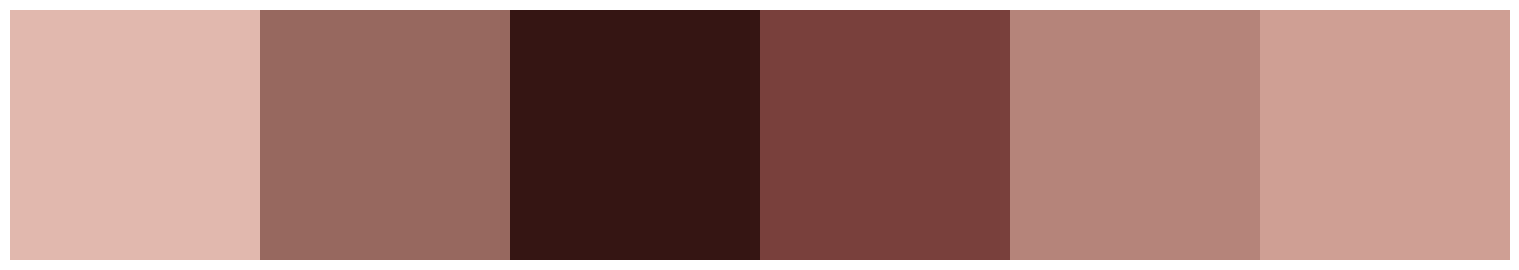

In [11]:
for folder in seasons:
    this_df = pd.DataFrame(columns=['H', 'S', 'V', 'L', 'A', 'B', 'C', 'M', 'Y', 'K', 'label'])
    
    for file in os.listdir(os.path.join(data_root, folder)):
        full_path = os.path.join(data_root, folder, file)
        
        palette = pc.create_palette(full_path)
        palette = np.array([palette], np.uint8)
        
        hsv_palette = cv2.cvtColor(palette, cv2.COLOR_BGR2HSV)
        lab_palette = cv2.cvtColor(palette, cv2.COLOR_BGR2LAB)
        cmyk_palette = bgr2cmyk(palette)
        
        mean_hsv = np.mean(hsv_palette, axis=1)
        mean_lab = np.mean(lab_palette, axis=1)
        mean_cmyk = np.mean(cmyk_palette, axis=1)
        
        row = np.concatenate((mean_hsv, mean_lab, mean_cmyk), axis=1).tolist()
        row.append(folder)
        this_df[len(this_df)] = row
        
    this_df.to_csv(f'images/dataset/mean_{folder}.csv', index=False)
        
    pd.concat([df, this_df], axis=0)

In [8]:
df.to_csv('images/dataset/mean.csv', index=False)

In [ ]:
print(f'Finished creating dataset for {len(df)} images')